In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
notions = pd.DataFrame({"Angles":np.arange(70,115,5),"Probabilities":1/10,"Reward":0,"Count":0})
notions

,Angles,Probabilities,Reward,Count
0,70,0.1,0,0
1,75,0.1,0,0
2,80,0.1,0,0
3,85,0.1,0,0
4,90,0.1,0,0
5,95,0.1,0,0
6,100,0.1,0,0
7,105,0.1,0,0
8,110,0.1,0,0


In [2]:
def stable_configuration_time(angle):
    if angle==90:
        return abs(np.random.normal(14,3))
    else:
        diff = abs (90 - angle) 
        diff_r = 1/diff * 45
        return abs(np.random.normal(diff_r,2))

In [3]:
def rewards(time):
    return np.random.normal(time)

In [10]:
import random
while (notions['Count'] <= 10 ).any(): 
    temp_ang = random.choices(notions['Angles'],weights=notions['Probabilities'])[0]
    notions.loc[notions['Angles'] == temp_ang, 'Count'] += 1 
    notions.loc[notions['Angles'] == temp_ang, 'Reward'] += rewards(stable_configuration_time(notions[notions['Angles'] == temp_ang]['Angles'].iloc[0]))

C:\Users\kashy\AppData\Local\Temp\ipykernel_21144\1275643685.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[4.06067794]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  notions.loc[notions['Angles'] == temp_ang, 'Reward'] += rewards(stable_configuration_time(notions[notions['Angles'] == temp_ang]['Angles'].iloc[0]))


In [12]:
temperature = 70
exps = np.exp(notions['Reward'] / temperature)
notions['Probabilities'] = (exps/sum(exps)).round(4)

In [14]:
notions["2Count"] = 0
notions["2Reward"] = 0
while (notions['2Count'] <= + 10 ).any(): 
    temp_ang = random.choices(notions['Angles'],weights=notions['Probabilities'])[0]
    notions.loc[notions['Angles'] == temp_ang, '2Count'] += 1 
    notions.loc[notions['Angles'] == temp_ang, '2Reward'] += rewards(stable_configuration_time(notions[notions['Angles'] == temp_ang]['Angles'].iloc[0]))

C:\Users\kashy\AppData\Local\Temp\ipykernel_21144\3897939707.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[5.93133096]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  notions.loc[notions['Angles'] == temp_ang, '2Reward'] += rewards(stable_configuration_time(notions[notions['Angles'] == temp_ang]['Angles'].iloc[0]))


In [15]:
#Greedy action
Action = notions[notions['2Reward'] ==notions['2Reward'].max()]['Angles'].iloc[0]
Action

90

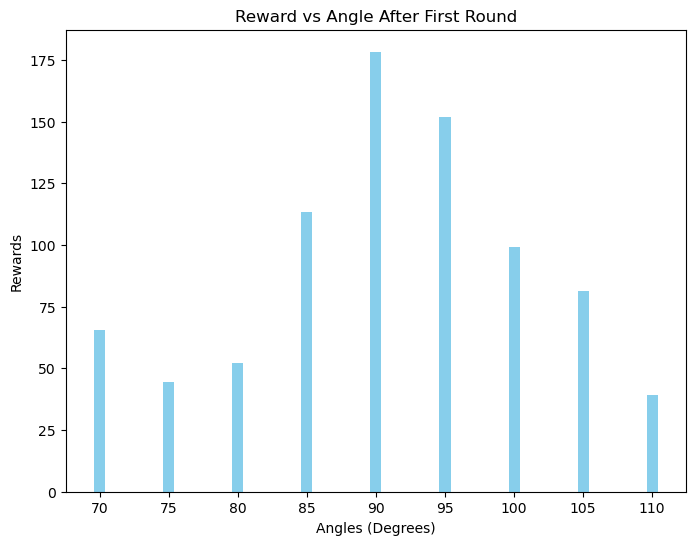

In [18]:
import matplotlib.pyplot as plt

# Plot Reward vs Angle after first round of training
plt.figure(figsize=(8,6))
plt.bar(notions['Angles'], notions['Reward'], color='skyblue')
plt.xlabel('Angles (Degrees)')
plt.ylabel('Rewards')
plt.title('Reward vs Angle After First Round')
plt.show()


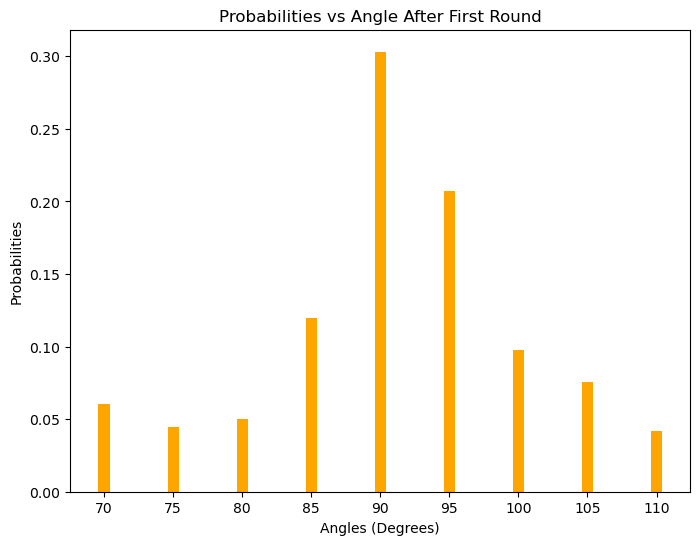

In [19]:
# Plot Probabilities after first round of training
plt.figure(figsize=(8,6))
plt.bar(notions['Angles'], notions['Probabilities'], color='orange')
plt.xlabel('Angles (Degrees)')
plt.ylabel('Probabilities')
plt.title('Probabilities vs Angle After First Round')
plt.show()


In [ ]:
# Cumulative rewards comparison
plt.figure(figsize=(8,6))
plt.plot(notions['Angles'], notions['Reward'], label='First Round Reward')
plt.plot(notions['Angles'], notions['2Reward'], label='Second Round Reward', linestyle='--')
plt.xlabel('Angles (Degrees)')
plt.ylabel('Cumulative Rewards')
plt.title('Cumulative Rewards for Each Angle')
plt.legend()
plt.show()
